In [1]:
import pandas as pd
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
# Trying to use geo pandas for spatial temporal analyis but it is not working
import geopandas as gpd

In [2]:
# Loading Green taxi data from 2021 to Feb 2022
file_path = r'C:\moody\data'
data =  pd.read_parquet(file_path, engine = 'auto') 

In [3]:
# Loading NYC cordinates data mapped to location id
file_path_taxi_zone = r'C:\moody\zone_data\taxi_zones.csv'
data_zone = pd.read_csv(file_path_taxi_zone)

X             float64
Y             float64
OBJECTID        int64
Shape_Leng    float64
Shape_Area    float64
zone           object
LocationID      int64
borough        object
dtype: object

In [4]:
# Transform and rename columns for subsequent processing.
data['pickup_date'] = data['lpep_pickup_datetime'].dt.date
data['dropoff_date'] = data['lpep_dropoff_datetime'].dt.date
data.rename(columns = {'lpep_pickup_datetime':'pickup_datetime', 'lpep_dropoff_datetime':'dropoff_datetime'}, inplace = True)
data['fare_amount'] = data['fare_amount'].astype(float)
data_zone['X'] = data_zone['X'].astype('str')
data_zone['Y']= data_zone['Y'].astype('str')
data_zone.rename(columns = {'X':'latitude', 'Y':'longitude'}, inplace = True)

In [5]:
# Adding pick up location coordinates columns in main dataset
data_cord_stg = pd.merge(data, data_zone, how='left', left_on=['PULocationID'], right_on=['LocationID'])
data_cord_stg.rename(columns = {'latitude':'pickup_latitude','longitude':'pickup_longitude'}, inplace = True)
data_cord_stg= data_cord_stg[["VendorID","pickup_date","dropoff_date","RatecodeID","PULocationID","DOLocationID","passenger_count","trip_distance","fare_amount","extra","mta_tax","tip_amount","tolls_amount","improvement_surcharge","total_amount","payment_type","trip_type","congestion_surcharge","pickup_latitude","pickup_longitude"]]
data_cord_stg


VendorID pickup_date dropoff_date  RatecodeID  PULocationID  \
0               2  2021-01-01   2021-01-01         1.0            43   
1               2  2021-01-01   2021-01-01         1.0           166   
2               2  2021-01-01   2021-01-01         1.0            41   
3               2  2020-12-31   2021-01-01         1.0           168   
4               2  2021-01-01   2021-01-01         2.0           265   
...           ...         ...          ...         ...           ...   
1203614         2  2022-02-28   2022-02-28         NaN            65   
1203615         2  2022-02-28   2022-03-01         NaN            97   
1203616         2  2022-02-28   2022-02-28         NaN            74   
1203617         2  2022-02-28   2022-02-28         NaN            42   
1203618         2  2022-02-28   2022-02-28         NaN           243   

         DOLocationID  passenger_count  trip_distance  fare_amount  extra  \
0                 151              1.0           1.01         5.50    0.5   
1                 239              1.0           2.53        10.00    0.5   
2                  42              1.0           1.12         6.00    0.5   
3                  75              1.0           1.99         8.00    0.5   
4                 265              3.0           0.00       -52.00    0.0   
...               ...              ...            ...          ...    ...   
1203614            87              NaN           2.61        13.60    0.0   
1203615           231              NaN           2.88        12.07    0.0   
1203616           116              NaN           2.22        10.68    0.0   
1203617            69              NaN           1.59         8.88    0.0   
1203618           100              NaN           8.16        27.74    0.0   

         mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0            0.5        0.00           0.0                    0.3   
1            0.5        2.81           0.0                    0.3   
2            0.5        1.00           0.0                    0.3   
3            0.5        0.00           0.0                    0.3   
4           -0.5        0.00           0.0                   -0.3   
...          ...         ...           ...                    ...   
1203614      0.0        3.66           0.0                    0.3   
1203615      0.0        3.00           0.0                    0.3   
1203616      0.0        1.22           0.0                    0.3   
1203617      0.0        0.00           0.0                    0.3   
1203618      0.0        6.79           0.0                    0.3   

         total_amount  payment_type  trip_type  congestion_surcharge  \
0                6.80           2.0        1.0                  0.00   
1               16.86           1.0        1.0                  2.75   
2                8.30           1.0        1.0                  0.00   
3                9.30           2.0        1.0                  0.00   
4              -52.80           3.0        1.0                  0.00   
...               ...           ...        ...                   ...   
1203614         20.31           NaN        NaN                   NaN   
1203615         18.12           NaN        NaN                   NaN   
1203616         12.20           NaN        NaN                   NaN   
1203617          9.18           NaN        NaN                   NaN   
1203618         37.58           NaN        NaN                   NaN   

        pickup_latitude pickup_longitude  
0           993784.3667      224349.9169  
1           994820.4931      234227.6404  
2           997520.5889      232274.1626  
3           1007211.151      233459.9183  
4                   NaN              NaN  
...                 ...              ...  
1203614     988251.1451      192619.7729  
1203615     991023.0993      190887.2895  
1203616     1001328.229      232772.3096  
1203617     1000990.471      238412.2291  
1203618     1002832.195      252121.4302  

[1203619

In [6]:
# Adding drop off location coordinates columns in main dataset
data_cord_final = pd.merge(data_cord_stg, data_zone, how='left', left_on=['DOLocationID'], right_on=['LocationID'])
data_cord_final.rename(columns = {'latitude':'dropof_latitude','longitude':'dropof_longitude'}, inplace = True)
data_cord_final= data_cord_final[["VendorID","pickup_date","dropoff_date","RatecodeID","PULocationID","DOLocationID","passenger_count","trip_distance","fare_amount","extra","mta_tax","tip_amount","tolls_amount","improvement_surcharge","total_amount","payment_type","trip_type","congestion_surcharge","pickup_latitude","pickup_longitude","dropof_latitude","dropof_longitude"]]
data_cord_final

VendorID pickup_date dropoff_date  RatecodeID  PULocationID  \
0               2  2021-01-01   2021-01-01         1.0            43   
1               2  2021-01-01   2021-01-01         1.0           166   
2               2  2021-01-01   2021-01-01         1.0            41   
3               2  2020-12-31   2021-01-01         1.0           168   
4               2  2021-01-01   2021-01-01         2.0           265   
...           ...         ...          ...         ...           ...   
1209203         2  2022-02-28   2022-02-28         NaN            65   
1209204         2  2022-02-28   2022-03-01         NaN            97   
1209205         2  2022-02-28   2022-02-28         NaN            74   
1209206         2  2022-02-28   2022-02-28         NaN            42   
1209207         2  2022-02-28   2022-02-28         NaN           243   

         DOLocationID  passenger_count  trip_distance  fare_amount  extra  \
0                 151              1.0           1.01         5.50    0.5   
1                 239              1.0           2.53        10.00    0.5   
2                  42              1.0           1.12         6.00    0.5   
3                  75              1.0           1.99         8.00    0.5   
4                 265              3.0           0.00       -52.00    0.0   
...               ...              ...            ...          ...    ...   
1209203            87              NaN           2.61        13.60    0.0   
1209204           231              NaN           2.88        12.07    0.0   
1209205           116              NaN           2.22        10.68    0.0   
1209206            69              NaN           1.59         8.88    0.0   
1209207           100              NaN           8.16        27.74    0.0   

         ...  tolls_amount  improvement_surcharge  total_amount  payment_type  \
0        ...           0.0                    0.3          6.80           2.0   
1        ...           0.0                    0.3         16.86           1.0   
2        ...           0.0                    0.3          8.30           1.0   
3        ...           0.0                    0.3          9.30           2.0   
4        ...           0.0                   -0.3        -52.80           3.0   
...      ...           ...                    ...           ...           ...   
1209203  ...           0.0                    0.3         20.31           NaN   
1209204  ...           0.0                    0.3         18.12           NaN   
1209205  ...           0.0                    0.3         12.20           NaN   
1209206  ...           0.0                    0.3          9.18           NaN   
1209207  ...           0.0                    0.3         37.58           NaN   

         trip_type  congestion_surcharge  pickup_latitude  pickup_longitude  \
0              1.0                  0.00      993784.3667       224349.9169   
1              1.0                  2.75      994820.4931       234227.6404   
2              1.0                  0.00      997520.5889       232274.1626   
3              1.0                  0.00      1007211.151       233459.9183   
4              1.0                  0.00              NaN               NaN   
...            ...                   ...              ...               ...   
1209203        NaN                   NaN      988251.1451       192619.7729   
1209204        NaN                   NaN      991023.0993       190887.2895   
1209205        NaN                   NaN      1001328.229       232772.3096   
1209206        NaN                   NaN      1000990.471       238412.2291   
1209207        NaN                   NaN      1002832.195       252121.4302   

        dropof_latitude dropof_longitude  
0           993163.0124      229962.8097  
1           990266.7853      224949.0756  
2           1000990.471      238412.2291  
3           999491.7068      227336.8825  
4                   NaN              NaN  
...                 ...              ..

In [7]:
# Calculating top 50 pick up coordinates by passenger count and fare amount. 
df_groupby= data_cord_final.groupby(['pickup_latitude','pickup_longitude'])
df_fare_amount = df_groupby[['fare_amount','passenger_count']].agg('sum','count')
df_fare_amount = df_fare_amount.sort_values(by=['fare_amount'],ascending=False).head(50)
df_fare_amount

fare_amount  passenger_count
pickup_latitude pickup_longitude                              
1001328.229     232772.3096        1510458.28         146476.0
999491.7068     227336.8825        1379600.36         145086.0
997520.5889     232274.1626         822167.18          75096.0
1000390.411     245761.3923         692439.68          37129.0
1000990.471     238412.2291         656609.96          40985.0
1026320.868     202890.8968         586478.28          43949.0
994820.4931     234227.6404         522433.30          45424.0
991023.0993     190887.2895         439198.45          25104.0
1005999.211     216570.1602         391290.71          27055.0
1019626.124     208344.7016         385857.65          31165.0
988251.1451     192619.7729         384198.05          24768.0
1039607.037     195561.1974         380987.89          14061.0
1000537.754     184780.9845         344748.58           3869.0
998816.0518     240775.0213         280872.62          14625.0
985545.3081     192934.8845         279570.91          11965.0
1017983.414     179276.9802         263570.85           1880.0
1031657.891     191801.4658         258528.50           4166.0
1015442.387     215841.865          254677.47          17572.0
993784.3667     224349.9169         252392.26          31103.0
988005.4733     189064.6011         239634.67           9797.0
986896.2156     149456.6732         236619.24           3389.0
999454.6176     178848.0044         235044.27           1496.0
1022782.513     236777.3522         231267.50           3598.0
990062.887      184111.7929         224316.14           6939.0
1012066.256     172053.1118         214028.69           1346.0
1008530.375     181132.3401         191732.50           1536.0
1031147.48      257767.3374         191316.33            734.0
994603.4693     172805.876          185105.78           1173.0
1028548.842     248848.8958         182740.31           1432.0
1003262.224     190226.848          175218.94           1235.0
998342.7423     191392.6395         169108.64           2618.0
1021943.971     202950.2294         162624.98           9119.0
975797.9399     166466.4165         161836.35           1129.0
1031383.547     197539.0295         160628.13           9594.0
1007671.346     241901.3543         152181.13           3673.0
993974.8786     190123.2803         151623.11           3417.0
1010327.417     254362.6257         150950.18           1533.0
1010929.715     211369.8834         149252.86          11578.0
1023441.084     261091.6499         144676.56            834.0
1007773.36      250243.0561         144575.04           1817.0
1002832.195     252121.4302         144064.59           4024.0
1007211.151     233459.9183         142144.85           3268.0
1006389.995     176995.4673         141604.31            651.0
1003837.482     207164.4234         139506.89           4512.0
996892.4997     237145.8587         136051.05           8732.0
1004989.375     241390.2232         134521.38           3950.0
1031218.509     217714.3724         134026.50           3750.0
1008169.271     237402.9332         133011.17           3643.0
1050079.729     191559.6782         132883.99            396.0
1002974.739     167858.6797         132817.99            433.0

In [8]:
# Caluculating highest 10 days in terms of trips count across the city
df_trip_groupby= data_cord_final.groupby(['pickup_date'])
df_trip = df_trip_groupby[['trip_distance']].agg('count')
df_trip = df_trip.sort_values(by=['trip_distance'],ascending=False).head(10)
df_trip = df_trip.rename(columns={'trip_distance':'trip_count'})
df_trip

trip_count
pickup_date            
2021-12-03         4257
2021-11-04         4169
2021-11-12         4168
2021-10-29         4166
2021-11-19         4161
2021-10-28         4152
2021-10-22         4141
2021-10-15         4122
2021-11-05         4108
2021-12-15         4084

In [9]:
# Calculating highest 50 pickup and drop off locations.
df_pudo_groupby= data_cord_final.groupby(['PULocationID','DOLocationID'])
df_pudo = df_pudo_groupby[['trip_distance']].agg('count')
df_pudo = df_pudo.sort_values(by=['trip_distance'],ascending=False).head(50)
df_pudo

trip_distance
PULocationID DOLocationID               
75           74                    18495
74           75                    18097
             74                    10428
75           75                     9683
74           41                     9263
41           42                     8990
95           95                     8989
74           236                    8985
             42                     8200
41           41                     7725
42           42                     7218
41           74                     7112
74           166                    6890
75           236                    6721
74           263                    6612
75           41                     5788
74           238                    5672
7            7                      5488
75           263                    5369
             238                    5358
42           41                     5272
75           42                     5123
74           43                     4510
41           75                     4429
74           151                    4289
41           166                    3800
166          166                    3717
82           82                     3669
42           74                     3602
129          129                    3386
74           239                    3304
             262                    3256
82           129                    3220
166          238                    3184
75           151                    3163
             237                    3151
193          193                    2962
74           116                    2905
75           141                    2762
244          244                    2731
166          41                     2707
95           135                    2669
74           244                    2656
97           49                     2625
75           166                    2616
74           140                    2595
166          74                     2581
75           262                    2555
130          130                    2543
95           28                     2499

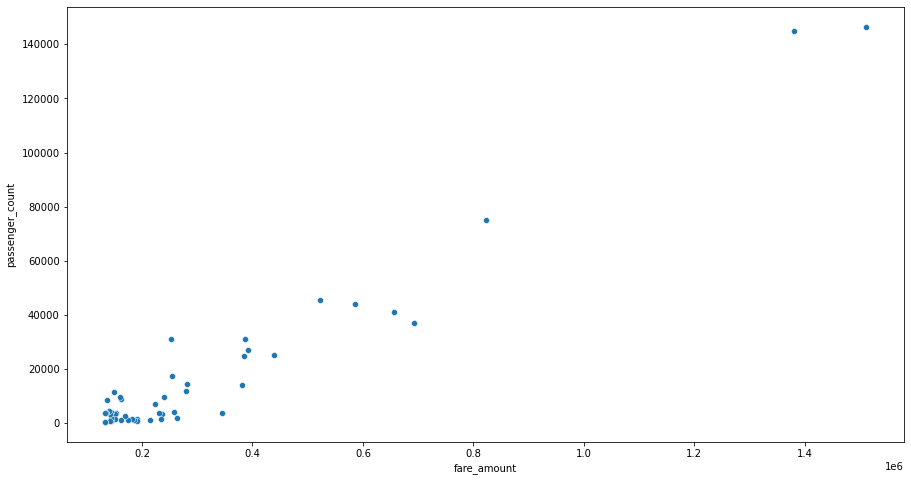

In [10]:
# Was trying to use geopandas to show grid over NYC map but it was not working, so use scattered plot below
# to display top 50 pick up coordinates by passenger count and fare amount
plt.figure(figsize=(15,8))
plt1 = sns.scatterplot(x='fare_amount',y='passenger_count',data = df_fare_amount)

<AxesSubplot:xlabel='pickup_date', ylabel='trip_count'>

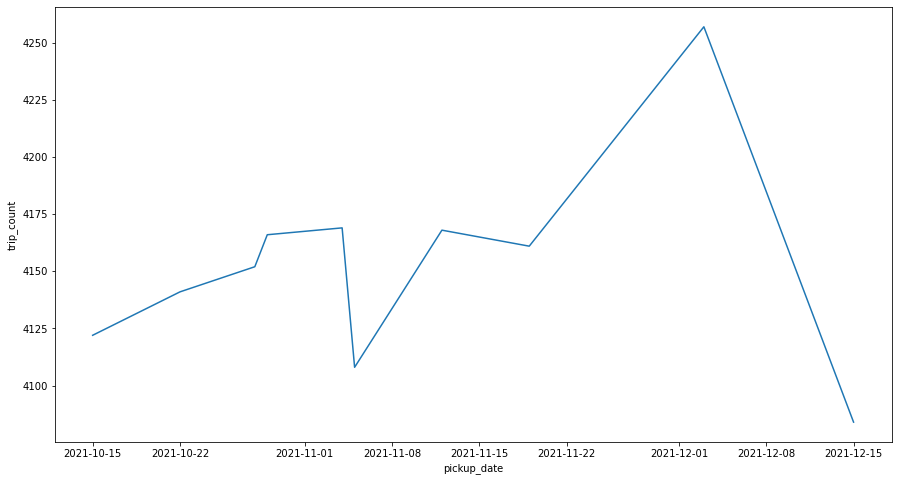

In [11]:
# Using line plot to display highest 10 days in terms of trips count.
plt.figure(figsize=(15,8))
sns.lineplot(x="pickup_date", y="trip_count", data=df_trip)

In [ ]:
# Was trying to use geopandas to show grid over NYC map to show 50 pickup and drop offs, 
# since geopandas are not working so skipping this plot.